# <font color = green>LEAD SCORING CASE STUDY</font>

### <font color = blue>Importing necessary libraries</font>

In [1]:
# libraries for Data Analysis
import numpy as np, pandas as pd

# libraries for Visualization
import matplotlib.pyplot as plt, seaborn as sns

#to create the Graphs Inline
%matplotlib inline

# library for Iteration
import itertools

#to display the entire rows and columns
pd.set_option('display.max_rows', None,'display.max_columns', None)

# library to suppress the Warnings
import warnings
warnings.filterwarnings(action="ignore")

# libraries for Data Modelling
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Libraries for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve

# Libraries for statsmodel
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## <font color = brown>SECTION 1: EXPLORATORY DATA ANALYSIS</font>
### <font color = blue>1.1 Reading & Understanding the Data</font>

In [2]:
#read the csv file:
df = pd.read_csv(r'Leads.csv')
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

<b>Insight:</b>
- Dataset has loaded properly
- 'Converted' is the target Variable

In [3]:
# creating a copy
df_orig = df.copy()

In [4]:
#dimension & shape:
print(df.ndim)
print(df.shape)

2
(9240, 37)


<b>Insight:</b>

- There are 9240 rows and 37 columns in the dataset

In [5]:
print(df.columns)

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


In [6]:
#summary:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
#statistical summary
df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

### <font color = blue>1.2 Data Quality Check</font>

In [8]:
#check if there are any duplicate values:
print(df.duplicated().sum())

0


<b>Insight:</b>
- All fine, no duplicate values   

In [9]:
# convert all values to lower case
df = df.applymap(lambda s:s.lower() if type(s) == str else s)

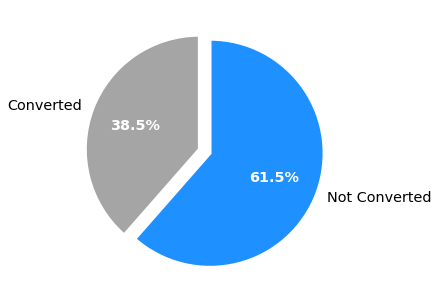

In [10]:
applicationData_T1 = df[df.Converted==1]
applicationData_T0 = df[df.Converted==0]

t1Counts = applicationData_T1.Converted.value_counts()
t2Counts = applicationData_T0.Converted.value_counts()

lbls=['Converted','Not Converted']
vals=[t1Counts[1],t2Counts[0]]

cmap = plt.get_cmap('Greys')
colors = list(cmap(np.linspace(0.45, 0.85, len(vals))))
colors[1] = 'dodgerblue'

fig, ax = plt.subplots(figsize=(6, 6))
patches, texts, pcts=plt.pie(vals, labels=lbls, autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'}, colors=colors,startangle=90,explode=(0, 0.1))
# Style just the percent values.
plt.setp(pcts, color='white', fontweight='bold')
plt.tight_layout()
plt.show()

In [11]:
#check if there are any column-wise null-values:
print(df.isnull().sum())

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

<b>Insight:</b>
- There are many variables with null-values.
- Looks like many variables need to be dropped, decision to be taken after imputing.

In [12]:
# divide the dataset into Categorical and Numerical variables

cat_cols = df.select_dtypes(include=['object'])
num_cols = df.select_dtypes(exclude=['object'])

In [13]:
# unique values of all categorical variables

for col in cat_cols:
    print("="*50)
    print(col,':', df[col].nunique())
    print(df[col].unique())

Prospect ID : 9240
['7927b2df-8bba-4d29-b9a2-b6e0beafe620'
 '2a272436-5132-4136-86fa-dcc88c88f482'
 '8cc8c611-a219-4f35-ad23-fdfd2656bd8a' ...
 'aac550fe-a586-452d-8d3c-f1b62c94e02c'
 '5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9'
 '571b5c8e-a5b2-4d57-8574-f2ffb06fdeff']
Lead Origin : 5
['api' 'landing page submission' 'lead add form' 'lead import'
 'quick add form']
Lead Source : 20
['olark chat' 'organic search' 'direct traffic' 'google' 'referral sites'
 'welingak website' 'reference' 'facebook' nan 'blog' 'pay per click ads'
 'bing' 'social media' 'welearn' 'click2call' 'live chat'
 'welearnblog_home' 'youtubechannel' 'testone' 'press_release' 'nc_edm']
Do Not Email : 2
['no' 'yes']
Do Not Call : 2
['no' 'yes']
Last Activity : 17
['page visited on website' 'email opened' 'unreachable'
 'converted to lead' 'olark chat conversation' 'email bounced'
 'email link clicked' 'form submitted on website' 'unsubscribed'
 'had a phone conversation' 'view in browser link clicked' nan
 'approached upfr

In [14]:
# count values of categorical variables

for col in cat_cols:
    if(col=="Prospect ID"):
        pass
    else:
        print("="*50)
        print(col)
        print(df[col].value_counts())

Lead Origin
landing page submission    4886
api                        3580
lead add form               718
lead import                  55
quick add form                1
Name: Lead Origin, dtype: int64
Lead Source
google               2873
direct traffic       2543
olark chat           1755
organic search       1154
reference             534
welingak website      142
referral sites        125
facebook               55
bing                    6
click2call              4
social media            2
live chat               2
press_release           2
pay per click ads       1
blog                    1
welearn                 1
welearnblog_home        1
youtubechannel          1
testone                 1
nc_edm                  1
Name: Lead Source, dtype: int64
Do Not Email
no     8506
yes     734
Name: Do Not Email, dtype: int64
Do Not Call
no     9238
yes       2
Name: Do Not Call, dtype: int64
Last Activity
email opened                    3437
sms sent                        2745
olark 

In [15]:
# replace 'select' with null because , these values does actually mean the option wasn't selected.
df = df.replace('select',np.nan)
df = df.replace('Select',np.nan)

In [16]:
# Check if all "Select" have been converted to "NA"
select_list = []
for col in cat_cols:
    if(col=="Prospect ID"):
        pass
    else:
        if("Select" in df[col].unique()):
            select_list.append(col) 
            
print(select_list)

[]


In [17]:
# utility functions
def getColumnsWithNullPercentage(df):
    nullcols_percentage = round(df.isnull().mean() * 100, 2)
    nullcols_with_percent = pd.DataFrame({'name': df.columns,'percent': nullcols_percentage.values})
    nullcols_with_percent.sort_values(by = 'percent', ascending = False, inplace = True)
    return nullcols_with_percent

def showBarPlotWithNullPercentage(df,title,figsize,rotation):
    if(df.percent.sum()>0):
         #plotting the Bar-Plot for NaN percentages (only for columns with Non-Zero percentage of NaN values)
        plt.figure(figsize = figsize)
        ax = sns.barplot(x= 'name', y = 'percent', data = df[df['percent'] > 0])
        ax.axhline(threshold, ls='--', color='red')
        plt.xticks(rotation = rotation)
        plt.xlabel('Variables')
        plt.ylabel('Null Value %')
        plt.title(title)
        plt.show()

                                             name  percent
13             How did you hear about X Education    78.46
28                                   Lead Profile    74.19
25                                   Lead Quality    51.59
33                     Asymmetrique Profile Score    45.65
32                    Asymmetrique Activity Score    45.65
30                    Asymmetrique Activity Index    45.65
31                     Asymmetrique Profile Index    45.65
29                                           City    39.71
12                                 Specialization    36.58
24                                           Tags    36.29
15  What matters most to you in choosing a course    29.32
14                What is your current occupation    29.11
11                                        Country    26.63
9                            Page Views Per Visit     1.48
7                                     TotalVisits     1.48
10                                  Last Activity     1.

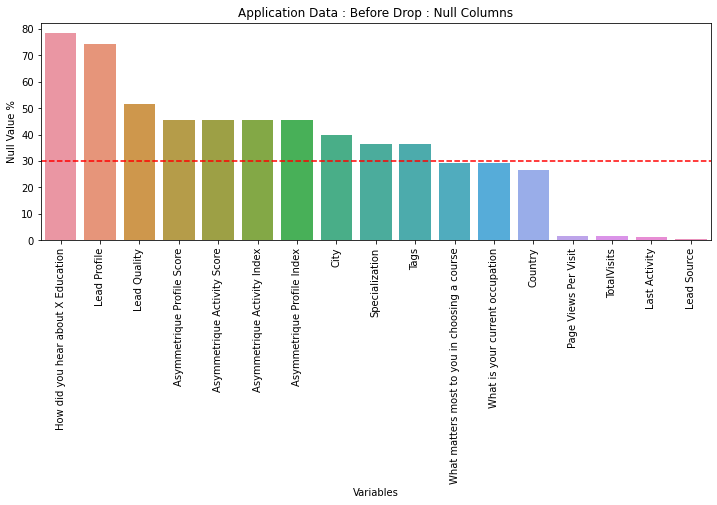

In [18]:
threshold=30
cols_with_null_percent_ds = getColumnsWithNullPercentage(df)
print(cols_with_null_percent_ds)
showBarPlotWithNullPercentage(cols_with_null_percent_ds,'Application Data : Before Drop : Null Columns',(12,4),90)

<b>Insight:</b>
- There are many variables with more than 30% of null values
- Variables which dosen't add much value and can be dropped
- Categorical variables which cannot be dropped can be imputed with the mode
- Numerical variables which cannot be dropped can be imputed with the median

In [19]:
# drop the following columns that have more than 40% null values

# a) How did you hear about X Education
# b) Lead Profile
# c) Lead Quality
# d) Asymmetrique Profile Score 
# e) Asymmetrique Activity Score 
# f) Asymmetrique Activity Index
# g) Asymmetrique Profile Index
# h) City
# i) Specialization
# j) Tags

df = df.drop(['How did you hear about X Education', 'Lead Profile', 'Lead Quality', 
              'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 
              'Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'City', 'Specialization',
             'Tags'], axis=1)

In [20]:
# checking the null-value % after dropping the variables

print(round(df.isnull().mean() * 100, 2))

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [21]:
# check the value counts for each values in the country variable

df.Country.value_counts()

india                   6492
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
hong kong                  7
bahrain                    7
oman                       6
france                     6
unknown                    5
south africa               4
nigeria                    4
germany                    4
kuwait                     4
canada                     4
sweden                     3
china                      2
asia/pacific region        2
uganda                     2
bangladesh                 2
italy                      2
belgium                    2
netherlands                2
ghana                      2
philippines                2
russia                     1
switzerland                1
vietnam                    1
denmark                    1
tanzania                   1
liberia                    1
malaysia      

In [22]:
# since "India" dominates the Country variable, we can drop the column

df = df.drop(['Country'], axis=1)

In [23]:
# Check the value counts for the column Lead Source

df['Lead Source'].value_counts()

google               2873
direct traffic       2543
olark chat           1755
organic search       1154
reference             534
welingak website      142
referral sites        125
facebook               55
bing                    6
click2call              4
social media            2
live chat               2
press_release           2
pay per click ads       1
blog                    1
welearn                 1
welearnblog_home        1
youtubechannel          1
testone                 1
nc_edm                  1
Name: Lead Source, dtype: int64

In [24]:
# since "Google" has the major chunk of data, we can impute the null values with Google

df['Lead Source'] = df['Lead Source'].replace(np.nan, 'Google')

In [25]:
# Check the value counts for the column Total Visits

df['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [26]:
# Check the median of column 

df['TotalVisits'].median()

3.0

In [27]:
# We shall impute the null values in TotalVisits by the median value which is 3.0

df['TotalVisits'] = df['TotalVisits'].replace(np.nan, df['TotalVisits'].median())

In [28]:
# Check the value counts for Page Views Per Visit

df['Page Views Per Visit'].value_counts()

0.00     2189
2.00     1795
3.00     1196
4.00      896
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       43
1.75       28
3.33       27
10.00      25
1.25       23
5.50       21
2.25       19
11.00      18
3.67       16
6.50       13
1.80       13
2.75       12
1.40       11
2.80        9
14.00       9
4.33        9
2.20        9
2.17        8
1.60        8
3.25        8
2.40        6
13.00       6
12.00       5
1.20        5
1.83        4
3.40        4
2.60        4
1.43        4
15.00       4
1.71        4
1.78        3
4.25        3
16.00       3
4.75        3
5.67        3
1.57        3
1.38        3
3.60        2
1.23        2
1.56        2
5.40        2
2.22        2
7.50        2
1.14        2
5.25        2
2.09        2
3.20        2
3.75        2
5.33        2
2.83        2
2.71        2
1.22        2
2.13        1
1.54        1
6.67  

In [29]:
# Check the median of the column

df['Page Views Per Visit'].median()

2.0

In [30]:
# Check the median of the column

df['Page Views Per Visit'] = df['Page Views Per Visit'].replace(np.nan, df['Page Views Per Visit'].median())

In [31]:
# Check the value counts for the column Last Activity

df['Last Activity'].value_counts()

email opened                    3437
sms sent                        2745
olark chat conversation          973
page visited on website          640
converted to lead                428
email bounced                    326
email link clicked               267
form submitted on website        116
unreachable                       93
unsubscribed                      61
had a phone conversation          30
approached upfront                 9
view in browser link clicked       6
email received                     2
email marked spam                  2
visited booth in tradeshow         1
resubscribed to emails             1
Name: Last Activity, dtype: int64

In [32]:
# Since we do not have any information of what the last activity of the customer would have been, we can add a new category 
# called 'Not Sure' for the null values

df['Last Activity'] = df['Last Activity'].replace(np.nan, 'Not Sure')

In [33]:
# Check the value counts for the column "What is your current Occupation"

df['What is your current occupation'].value_counts()

unemployed              5600
working professional     706
student                  210
other                     16
housewife                 10
businessman                8
Name: What is your current occupation, dtype: int64

In [34]:
# Since no information has been provided Current Occupation, we can add a new category called No Information and set that 
# as value for the null columns

df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'No Information')

In [35]:
# Check the value counts for the column What matters most to you in choosing a course 

df['What matters most to you in choosing a course'].value_counts()

better career prospects      6528
flexibility & convenience       2
other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [36]:
matters_most_percentage = round(100*len(df[df['What matters most to you in choosing a course'] == 'Better Career Prospects'])/len(df['What matters most to you in choosing a course']),2)
print(matters_most_percentage)

0.0


In [37]:
df = df.drop(['What matters most to you in choosing a course'], axis=1)

In [38]:
# checking the null-value % after droping and imputing the variables

print(round(df.isnull().mean() * 100, 2))

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content       

In [39]:
# the following variables have only one value "No" in all the rows, we can eliminate the columns :

# a) Magazine
# b) Receive More Updates About Our Courses
# c) Update me on Supply Chain Content
# d) Get updates on DM Content
# e) I agree to pay the amount through cheque

df = df.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
                          'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis=1)

In [40]:
df.shape

(9240, 20)

### <font color = blue>1.4 Univariate Analysis</font>
<b>Outlier Treatment</b>

In [41]:
# Create a temporary copy of leads
df_temp = df.copy()

In [42]:
# Checking shapes on dataframe
df.shape, df_temp.shape

((9240, 20), (9240, 20))

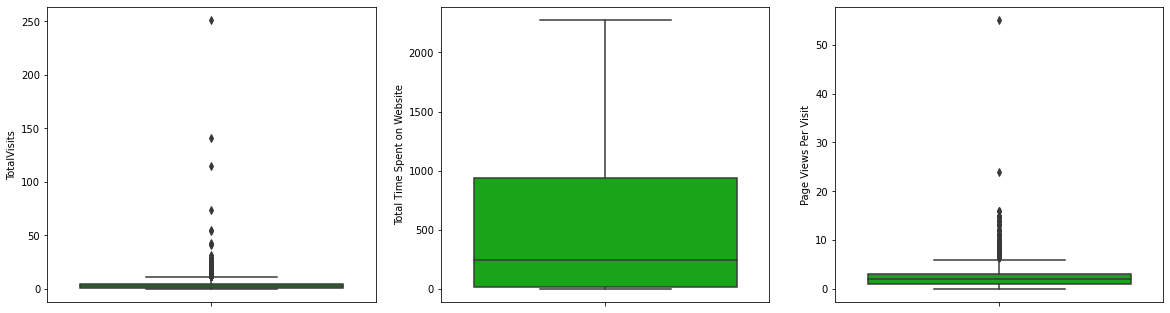

In [43]:
# Check the outliers in the numeric variables

plt.figure(figsize=(20, 25))

plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits', palette='nipy_spectral', data = df)

plt.subplot(4,3,2)
sns.boxplot(y = 'Total Time Spent on Website', palette='nipy_spectral', data = df)

plt.subplot(4,3,3)
sns.boxplot(y = 'Page Views Per Visit', palette='nipy_spectral', data = df)

plt.show()

In [44]:
# Removing values beyond 99% for Total Visits

nn_quartile_total_visits = df['TotalVisits'].quantile(0.99)
df = df[df["TotalVisits"] < nn_quartile_total_visits]
df["TotalVisits"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9141.000000
mean        3.179740
std         2.913631
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
99%        13.000000
max        16.000000
Name: TotalVisits, dtype: float64

In [45]:
# Checking outliers at 25%,50%,75%,90%,95% and above

df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9141.00000  9141.000000  9141.000000                  9141.000000   
mean   617233.45192     0.385406     3.179740                   486.074609   
std     23413.72193     0.486718     2.913631                   547.856302   
min    579533.00000     0.000000     0.000000                     0.000000   
25%    596519.00000     0.000000     1.000000                    10.000000   
50%    615563.00000     0.000000     3.000000                   247.000000   
75%    637414.00000     1.000000     5.000000                   933.000000   
90%    650514.00000     1.000000     7.000000                  1379.000000   
95%    655406.00000     1.000000     9.000000                  1561.000000   
99%    659592.80000     1.000000    13.000000                  1839.600000   
max    660737.00000     1.000000    16.000000                  2272.000000   

       Page Views Per Visit  
count           9141.000000  
mean               2.329506  
std                2.046673  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.000000  
90%                5.000000  
95%                6.000000  
99%                9.000000  
max               16.000000

In [46]:
# Removing values beyond 99% for page Views Per Visit

nn_quartile_page_visits = df['Page Views Per Visit'].quantile(0.99)
df = df[df["Page Views Per Visit"] < nn_quartile_page_visits]
df["Page Views Per Visit"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9029.000000
mean        2.226383
std         1.823395
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         7.000000
max         8.000000
Name: Page Views Per Visit, dtype: float64

In [47]:
# Checking outliers at 25%,50%,75%,90%,95% and above
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9029.000000  9029.000000  9029.000000                  9029.000000   
mean   617223.248422     0.385092     3.087164                   483.133016   
std     23372.383121     0.486644     2.801244                   547.420675   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596530.000000     0.000000     1.000000                     7.000000   
50%    615645.000000     0.000000     3.000000                   245.000000   
75%    637360.000000     1.000000     4.000000                   929.000000   
90%    650463.200000     1.000000     7.000000                  1378.000000   
95%    655351.600000     1.000000     8.000000                  1558.000000   
99%    659577.800000     1.000000    13.000000                  1839.720000   
max    660737.000000     1.000000    16.000000                  2272.000000   

       Page Views Per Visit  
count           9029.000000  
mean               2.226383  
std                1.823395  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.000000  
90%                5.000000  
95%                6.000000  
99%                7.000000  
max                8.000000

<b>Analysing each feature variable with Converted</b>

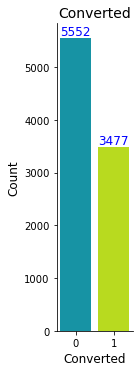

In [48]:
# Conversion Rate 

plot = sns.catplot(x="Converted", kind="count", data=df, palette="nipy_spectral", aspect= 0.4);

plt.title('Converted', fontsize = 14)
plt.xlabel("Converted", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')
    
plt.show()

<b>Insight:</b>
- Overall conversion rate is around 39%

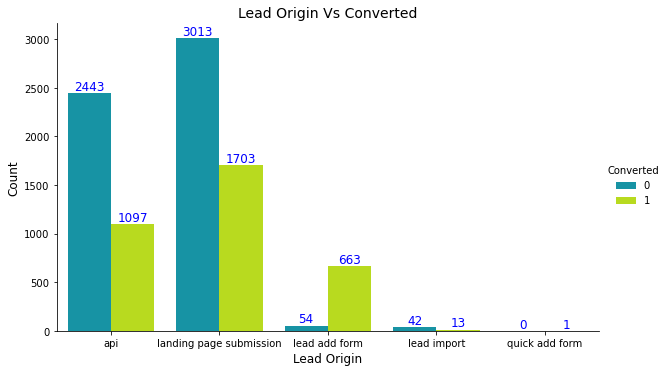

In [49]:
# Lead Origin

plot = sns.catplot(x="Lead Origin", hue = "Converted", kind="count", data=df, palette="nipy_spectral", aspect= 1.7);

plt.title('Lead Origin Vs Converted', fontsize = 14)
plt.xlabel("Lead Origin", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')
    
plt.show()

<b>Insight:</b>
- Maximum conversion happened from Landing Page Submission

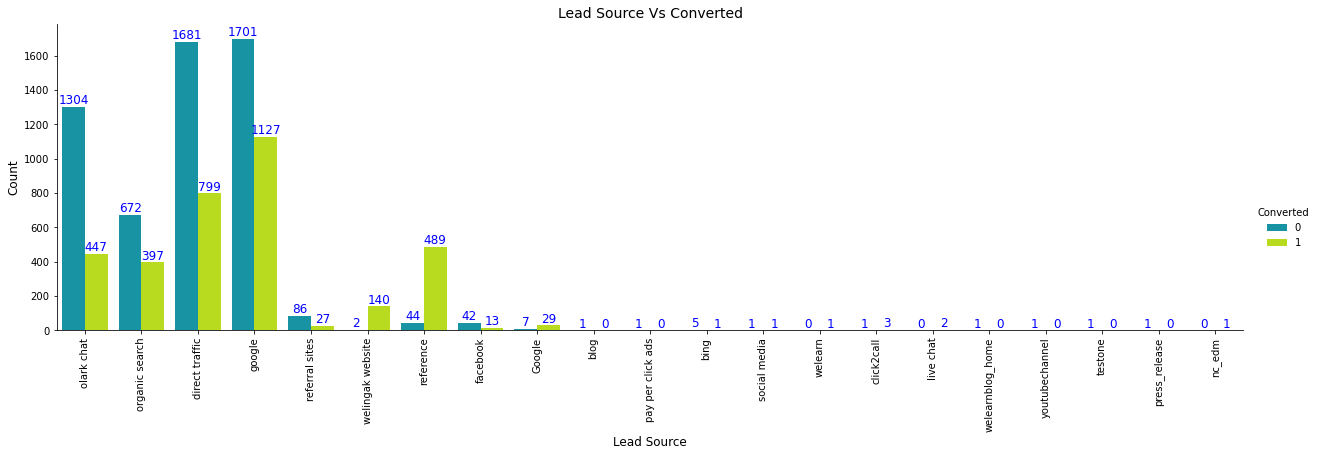

In [50]:
# Lead Source

plot = sns.catplot(x="Lead Source", hue = "Converted", kind="count", data=df, palette="nipy_spectral", aspect = 3.5);

plt.title('Lead Source Vs Converted', fontsize = 14)
plt.xlabel("Lead Source", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')
   
plt.show()

<b>Insight:</b>
- Google and Direct Traffic consecutively leads the highest conversion rate.

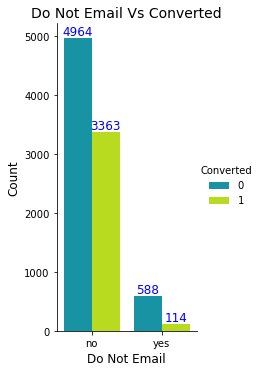

In [51]:
# checking the impact of 'Do not Email'

plot = sns.catplot(x="Do Not Email", hue = "Converted", kind="count", data=df, palette="nipy_spectral", aspect = 0.6);

plt.title('Do Not Email Vs Converted', fontsize = 14)
plt.xlabel("Do Not Email", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

<b>Insight:</b>
- This shows majority of the conversion were made when emails were sent
- Even though few customers has selected whether or not they want to be emailed about the course or not, small amount have been benefited and converted by emails.

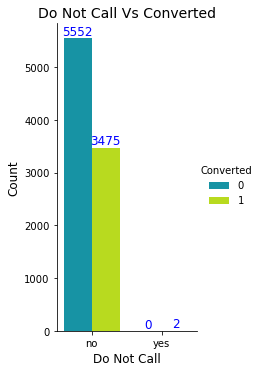

In [52]:
# checking the impact of 'Do not Call'

plot = sns.catplot(x="Do Not Call", hue = "Converted", kind="count", data=df, palette="nipy_spectral", aspect = 0.6);

plt.title('Do Not Call Vs Converted', fontsize = 14)
plt.xlabel("Do Not Call", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

<b>Insight:</b>
- This shows that majority were converted when call were made
- 2 customers who selected 'Do Not Call' also got converted

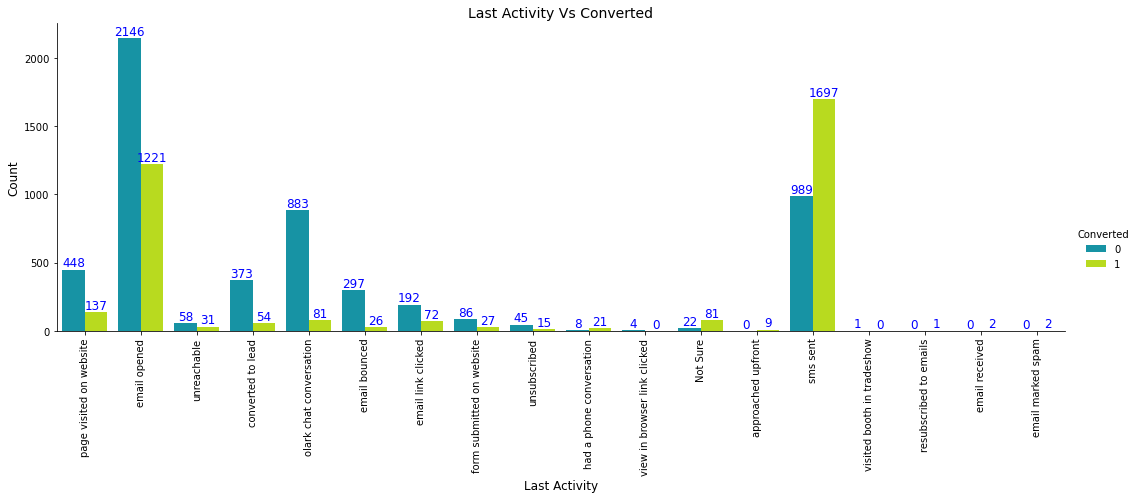

In [53]:
# checking the impact of 'Last Activity'

plot = sns.catplot(x="Last Activity", hue = "Converted", kind="count", data=df, palette="nipy_spectral", aspect = 3.0);

plt.title('Last Activity Vs Converted', fontsize = 14)
plt.xlabel("Last Activity", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

<b>Insight:</b>
- 'Last Activity' with SMS Sent have the highest conversion rate followed by Email Opened

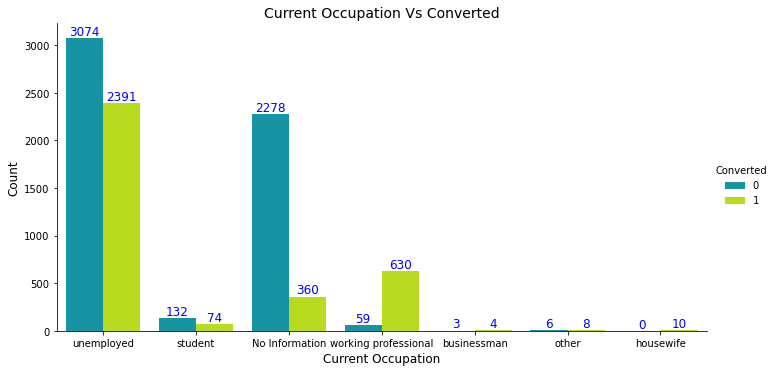

In [54]:
# checking the impact of occupation status

plot = sns.catplot(x="What is your current occupation", hue = "Converted", kind="count", data=df, palette="nipy_spectral", 
                   aspect = 2.0);

plt.title('Current Occupation Vs Converted', fontsize = 14)
plt.xlabel("Current Occupation", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

<b>Insight:</b>
- This shows most of the customers are unemployed and the next being the Working Professional

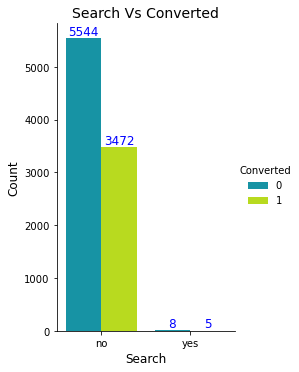

In [55]:
# checking the impact of 'Search'

plot = sns.catplot(x="Search", hue = "Converted", kind="count", data=df, palette="nipy_spectral", aspect = 0.7);

plt.title('Search Vs Converted', fontsize = 14)
plt.xlabel("Search", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

<b>Insight:</b>
- This shows customers who has searched has been converted.

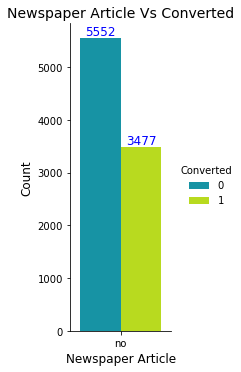

In [56]:
# checking the impact of 'Newspaper Article'

plot = sns.catplot(x="Newspaper Article", hue = "Converted", kind="count", data=df, palette="nipy_spectral", aspect = 0.5);

plt.title('Newspaper Article Vs Converted', fontsize = 14)
plt.xlabel("Newspaper Article", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

<b>Insight:</b>
- This shows that only one customer got converted by Newspaper Article

In [57]:
# Dropping Newspaper variable

df = df.drop(['Newspaper Article'], axis=1)

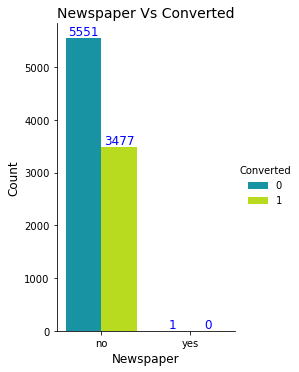

In [58]:
# checking the impact of Newspaper

plot = sns.catplot(x="Newspaper", hue = "Converted", kind="count", data=df, palette="nipy_spectral", aspect = 0.7);

plt.title('Newspaper Vs Converted', fontsize = 14)
plt.xlabel("Newspaper", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

<b>Insight:</b>
- This shows Newspaper has a poor conversion rate

In [59]:
# Dropping Newspaper column

df = df.drop(['Newspaper'], axis=1)

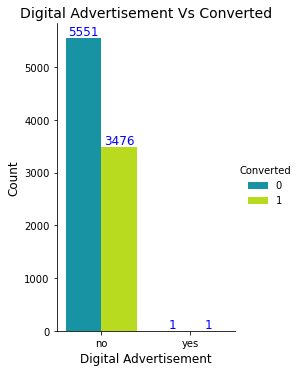

In [60]:
# Checking the impact of 'Digital Advertisement'

plot = sns.catplot(x="Digital Advertisement", hue = "Converted", kind="count", data=df, palette="nipy_spectral", aspect = 0.7);

plt.title('Digital Advertisement Vs Converted', fontsize = 14)
plt.xlabel("Digital Advertisement", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

<b>Insight:</b>
- This shows Digital Advertisement also didn't produce good conversion

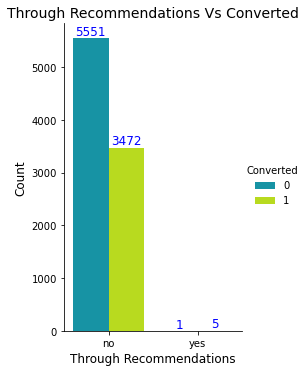

In [61]:
# checking the impact of 'Through Recommendations'

plot = sns.catplot(x="Through Recommendations", hue = "Converted", kind="count", data=df, palette="nipy_spectral", aspect = 0.7);

plt.title('Through Recommendations Vs Converted', fontsize = 14)
plt.xlabel("Through Recommendations", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

<b>Insight:</b>
- This shows 'Through Recommendations' is also not a good converter

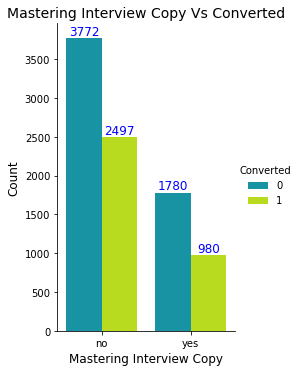

In [62]:
# checking the impact of 'A free copy of Mastering The Interview'

plot = sns.catplot(x="A free copy of Mastering The Interview", hue = "Converted", kind="count", data=df, palette="nipy_spectral",
                   aspect = 0.7);

plt.title('Mastering Interview Copy Vs Converted', fontsize = 14)
plt.xlabel("Mastering Interview Copy", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

<b>Insight:</b>
- This shows though there are good conversion numbers who got a free copy, the customers who didn't receive a free copy has more conversion rate

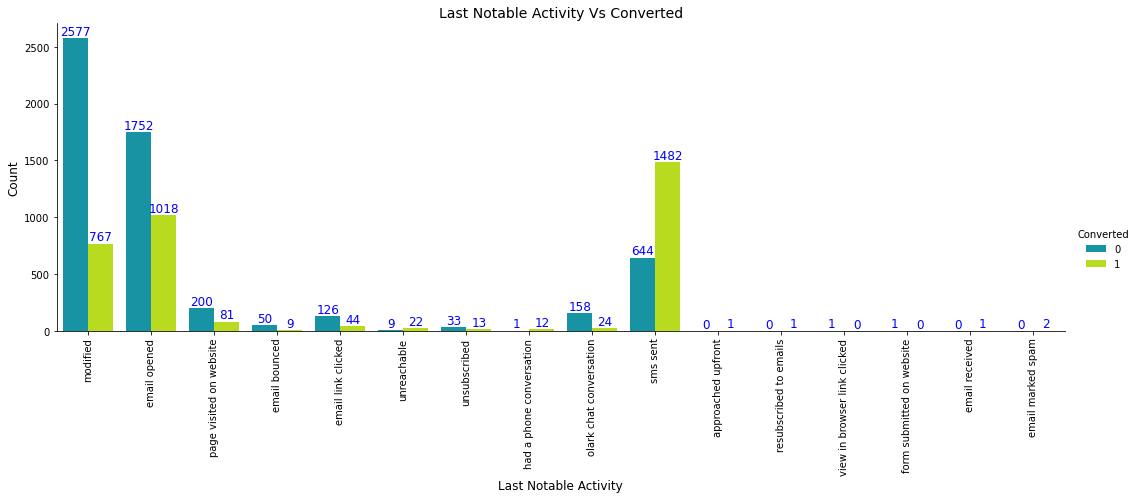

In [63]:
# checking the impact of 'Last Notable Activity'

plot = sns.catplot(x="Last Notable Activity", hue = "Converted", kind="count", data=df, palette="nipy_spectral", aspect = 3.0);

plt.title('Last Notable Activity Vs Converted', fontsize = 14)
plt.xlabel("Last Notable Activity", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

<b>Insight:</b>
- This shows that SMS Sent has more conversion rate followed by Email Opened and Modified.

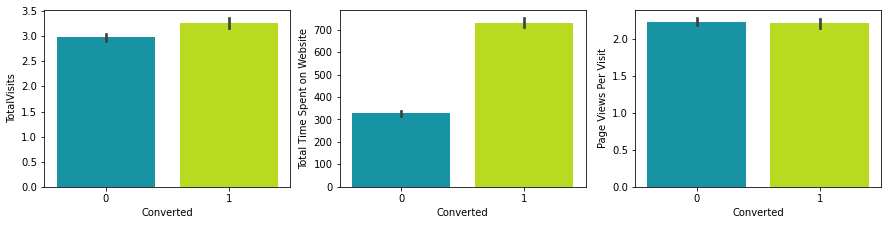

In [64]:
# check the impact for the numeric variables

plt.figure(figsize=(15, 15))

plt.subplot(4,3,1)
sns.barplot(x = 'Converted', y = 'TotalVisits', data = df, palette = 'nipy_spectral')

plt.subplot(4,3,2)
sns.barplot(x = 'Converted', y = 'Total Time Spent on Website', data = df, palette = 'nipy_spectral')

plt.subplot(4,3,3)
sns.barplot(x = 'Converted', y = 'Page Views Per Visit', data = df, palette = 'nipy_spectral')

plt.show()

<b>Insight:</b>
- This shows that the continuous variables has good conversion rate

## <font color = brown>SECTION 2: MODEL BUILDING</font>
### <font color = blue>2.1 Data Preparation</font>

In [65]:
# create dummy variable for relevant columns

dummy_col = [ 'Lead Origin','Lead Source','Last Activity', 'What is your current occupation','Last Notable Activity']

df = pd.get_dummies(df,columns=dummy_col, drop_first = True)
df.head(2)

Prospect ID  Lead Number Do Not Email Do Not Call  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737           no          no   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728           no          no   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   

  Search X Education Forums Digital Advertisement Through Recommendations  \
0     no                 no                    no                      no   
1     no                 no                    no                      no   

  A free copy of Mastering The Interview  Lead Origin_landing page submission  \
0                                     no                                    0   
1                                     no                                    0   

   Lead Origin_lead add form  Lead Origin_lead import  \
0                          0                        0   
1                          0                        0   

   Lead Origin_quick add form  Lead Source_bing  Lead Source_blog  \
0                           0                 0                 0   
1                           0                 0                 0   

   Lead Source_click2call  Lead Source_direct traffic  Lead Source_facebook  \
0                       0                           0                     0   
1                       0                           0                     0   

   Lead Source_google  Lead Source_live chat  Lead Source_nc_edm  \
0                   0                      0                   0   
1                   0                      0                   0   

   Lead Source_olark chat  Lead Source_organic search  \
0                       1                           0   
1                       0                           1   

   Lead Source_pay per click ads  Lead Source_press_release  \
0                              0                          0   
1                              0                          0   

   Lead Source_reference  Lead Source_referral sites  \
0                      0                           0   
1                      0                           0   

   Lead Source_social media  Lead Source_testone  Lead Source_welearn  \
0                         0                    0                    0   
1                         0                    0                    0   

   Lead Source_welearnblog_home  Lead Source_welingak website  \
0                             0                             0   
1                             0                             0   

   Lead Source_youtubechannel  Last Activity_approached upfront  \
0                           0                                 0   
1                           0                                 0   

   Last Activity_converted to lead  Last Activity_email bounced  \
0                                0                            0   
1                                0                            0   

   Last Activity_email link clicked  Last Activity_email marked spam  \
0                                 0                                0   
1                                 0                                0   

   Last Activity_email opened  Last Activity_email received  \
0                           0                             0   
1                           1                             0   

   Last Activity_form submitted on website  \
0                                        0   
1                                        0   

   Last Activity_had a phone conversation  \
0                                       0   
1                                       0   

   Last Activity_olark chat conversation  \
0                                      0   
1                                      0   

   Last Activity_page visited on website  \
0                                 

In [66]:
# Encode the binary categorical columns (Yes/No)

bin_cols=['A free copy of Mastering The Interview', 'Through Recommendations', 'Digital Advertisement', 'Search','Do Not Call','Do Not Email']

def binary_map(x):
    return x.map({'yes': 1, "no": 0})

df[bin_cols] = df[bin_cols].apply(binary_map)
df.head(2)

Prospect ID  Lead Number  Do Not Email  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737             0   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728             0   

   Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0            0          0          0.0                            0   
1            0          0          5.0                          674   

   Page Views Per Visit  Search X Education Forums  Digital Advertisement  \
0                   0.0       0                 no                      0   
1                   2.5       0                 no                      0   

   Through Recommendations  A free copy of Mastering The Interview  \
0                        0                                       0   
1                        0                                       0   

   Lead Origin_landing page submission  Lead Origin_lead add form  \
0                                    0                          0   
1                                    0                          0   

   Lead Origin_lead import  Lead Origin_quick add form  Lead Source_bing  \
0                        0                           0                 0   
1                        0                           0                 0   

   Lead Source_blog  Lead Source_click2call  Lead Source_direct traffic  \
0                 0                       0                           0   
1                 0                       0                           0   

   Lead Source_facebook  Lead Source_google  Lead Source_live chat  \
0                     0                   0                      0   
1                     0                   0                      0   

   Lead Source_nc_edm  Lead Source_olark chat  Lead Source_organic search  \
0                   0                       1                           0   
1                   0                       0                           1   

   Lead Source_pay per click ads  Lead Source_press_release  \
0                              0                          0   
1                              0                          0   

   Lead Source_reference  Lead Source_referral sites  \
0                      0                           0   
1                      0                           0   

   Lead Source_social media  Lead Source_testone  Lead Source_welearn  \
0                         0                    0                    0   
1                         0                    0                    0   

   Lead Source_welearnblog_home  Lead Source_welingak website  \
0                             0                             0   
1                             0                             0   

   Lead Source_youtubechannel  Last Activity_approached upfront  \
0                           0                                 0   
1                           0                                 0   

   Last Activity_converted to lead  Last Activity_email bounced  \
0                                0                            0   
1                                0                            0   

   Last Activity_email link clicked  Last Activity_email marked spam  \
0                                 0                                0   
1                                 0                                0   

   Last Activity_email opened  Last Activity_email received  \
0                           0                             0   
1                           1                             0   

   Last Activity_form submitted on website  \
0                                        0   
1                                        0   

   Last Activity_had a phone conversation  \
0                                       0   
1                                       0   

   Last Activity_olark chat conversation  \
0                                      0   
1                                      0   

   Last Activity_page visited on website  \
0               

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9029 entries, 0 to 9239
Data columns (total 75 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Prospect ID                                           9029 non-null   object 
 1   Lead Number                                           9029 non-null   int64  
 2   Do Not Email                                          9029 non-null   int64  
 3   Do Not Call                                           9029 non-null   int64  
 4   Converted                                             9029 non-null   int64  
 5   TotalVisits                                           9029 non-null   float64
 6   Total Time Spent on Website                           9029 non-null   int64  
 7   Page Views Per Visit                                  9029 non-null   float64
 8   Search                                                9029

In [68]:
# Remove following variables

# a) Prospect ID
# b) Lead Numbers


df = df.drop(['Prospect ID', 'Lead Number', 'X Education Forums'], axis=1)

In [69]:
# check for percentage of null values in each column

print(round(df.isnull().mean() * 100, 2))

Do Not Email                                            0.0
Do Not Call                                             0.0
Converted                                               0.0
TotalVisits                                             0.0
Total Time Spent on Website                             0.0
Page Views Per Visit                                    0.0
Search                                                  0.0
Digital Advertisement                                   0.0
Through Recommendations                                 0.0
A free copy of Mastering The Interview                  0.0
Lead Origin_landing page submission                     0.0
Lead Origin_lead add form                               0.0
Lead Origin_lead import                                 0.0
Lead Origin_quick add form                              0.0
Lead Source_bing                                        0.0
Lead Source_blog                                        0.0
Lead Source_click2call                  

In [70]:
df.shape

(9029, 72)

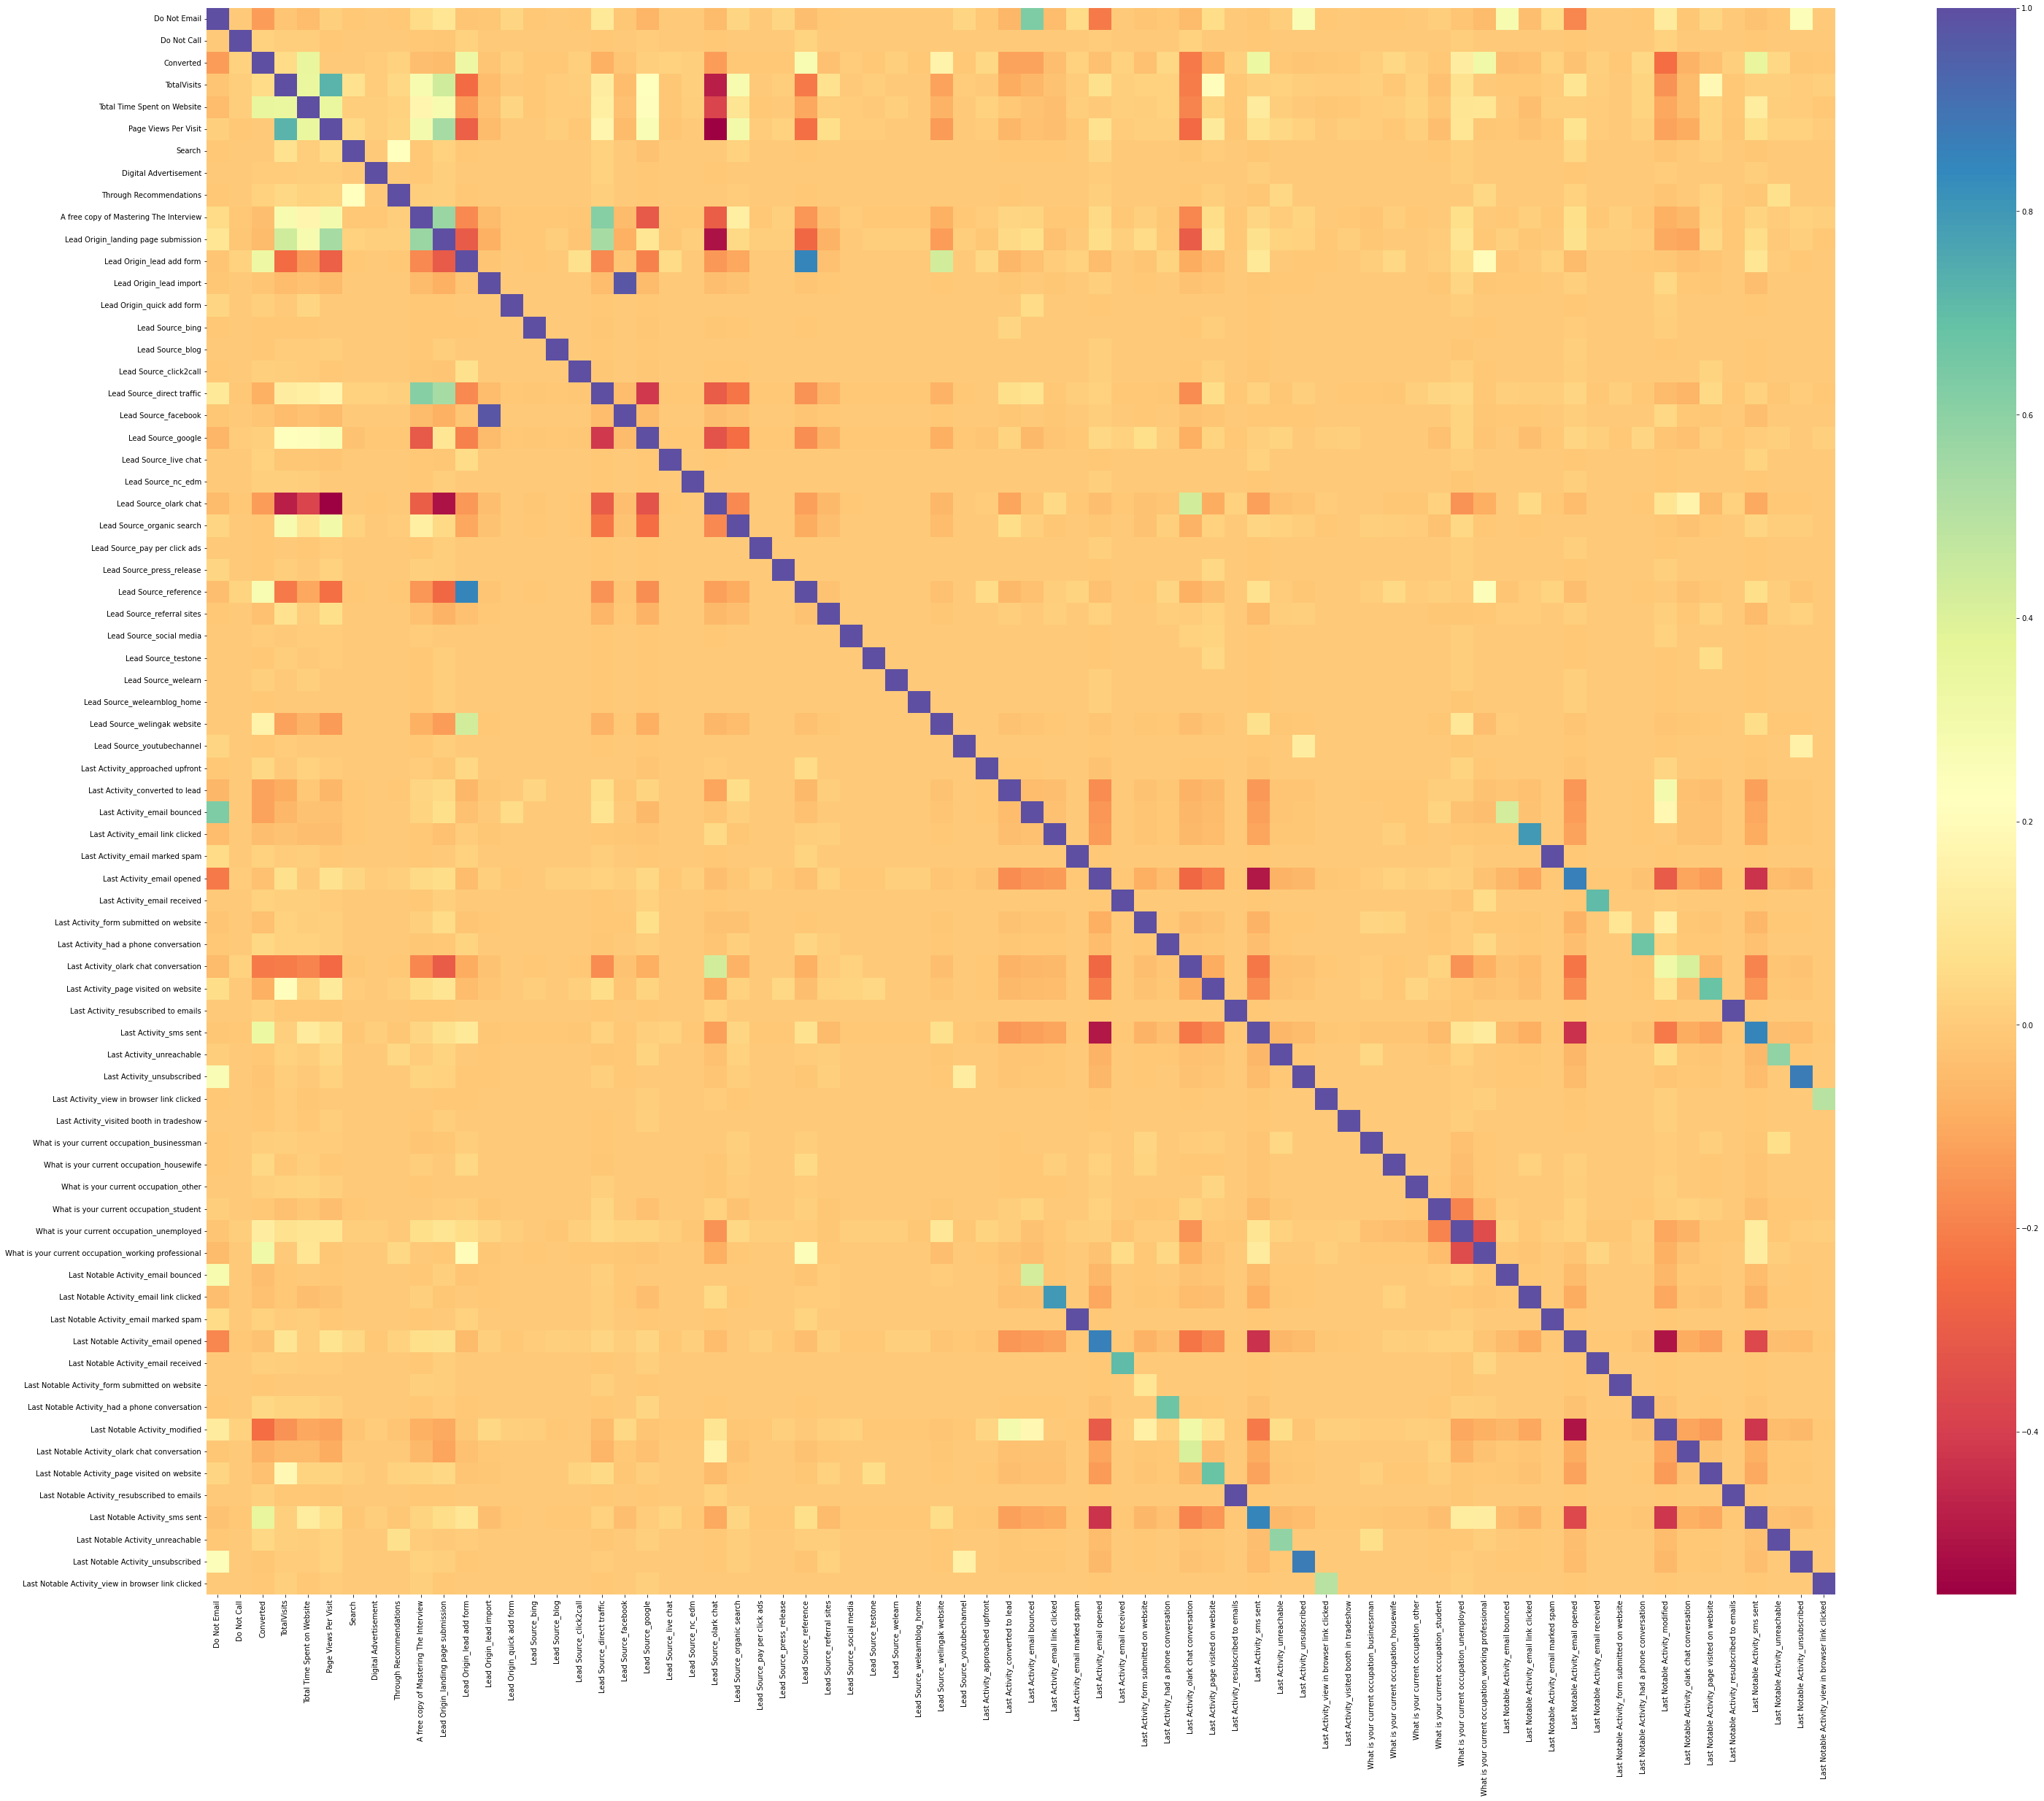

In [71]:
# Let's see the correlation matrix 
plt.figure(figsize = (50,40))
sns.heatmap(df.corr(),cmap='Spectral')
plt.show()

<b>Insight:</b>
- Following group of variables are positively highly correlated with each other:

    1. Search
    2. Digital Advertisement
    3. Through Recomendations

- Another set of variables are also positively highly correlated with each other:

    1. TotalVisits
    2. Total Time Spent on Website
    3. Page Views Per Visit

### <font color = blue>2.2 Train-Test Split</font>

In [72]:
# assigning feature variable to X

X = df.drop("Converted",axis=1)
X.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
0             0            0          0.0                            0   
1             0            0          5.0                          674   
2             0            0          2.0                         1532   
3             0            0          1.0                          305   
4             0            0          2.0                         1428   

   Page Views Per Visit  Search  Digital Advertisement  \
0                   0.0       0                      0   
1                   2.5       0                      0   
2                   2.0       0                      0   
3                   1.0       0                      0   
4                   1.0       0                      0   

   Through Recommendations  A free copy of Mastering The Interview  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       1   
3                        0                                       0   
4                        0                                       0   

   Lead Origin_landing page submission  Lead Origin_lead add form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_lead import  Lead Origin_quick add form  Lead Source_bing  \
0                        0                           0                 0   
1                        0                           0                 0   
2                        0                           0                 0   
3                        0                           0                 0   
4                        0                           0                 0   

   Lead Source_blog  Lead Source_click2call  Lead Source_direct traffic  \
0                 0                       0                           0   
1                 0                       0                           0   
2                 0                       0                           1   
3                 0                       0                           1   
4                 0                       0                           0   

   Lead Source_facebook  Lead Source_google  Lead Source_live chat  \
0                     0                   0                      0   
1                     0                   0                      0   
2                     0                   0                      0   
3                     0                   0                      0   
4                     0                   1                      0   

   Lead Source_nc_edm  Lead Source_olark chat  Lead Source_organic search  \
0                   0                       1                           0   
1                   0                       0                           1   
2                   0                       0                           0   
3                   0                       0                           0   
4                   0                       0                           0   

   Lead Source_pay per click ads  Lead Source_press_release  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   

   Lead Source_reference  Lead Source_referral sites  \
0                      0                           0   
1                      0                           0   
2                      0          

In [73]:
# assigning feature variable to y

y = df["Converted"]
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [74]:
# Quick review of X and y

X.shape, y.shape

((9029, 71), (9029,))

In [75]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [76]:
# Check shape of train and test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6320, 71), (2709, 71), (6320,), (2709,))

<b>Rescaling the features:</b>

In [77]:
# Determine features to scale

scale_col = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

In [78]:
# Scale X_train

scaler = StandardScaler()
X_train[scale_col] = scaler.fit_transform(X_train[scale_col])
X_train[scale_col].head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit
5493    -0.394290                    -0.708153             -0.135234
8064    -0.039721                    -0.711823              0.410454
4716    -0.039721                    -0.471434              0.410454
9117    -1.103429                    -0.884316             -1.226608
2402     1.023987                     0.704822             -0.135234

In [79]:
# Scale X_test
X_test[scale_col] = scaler.fit_transform(X_test[scale_col])
X_test[scale_col].head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit
4664    -1.099586                    -0.878776             -1.208743
5394     0.352414                    -0.582229             -0.470067
1595     0.352414                     1.238640              1.012839
2111     1.441414                     0.065110              2.679026
9182    -1.099586                    -0.878776             -1.208743

In [80]:
# Checking the Conversion Rate percentage

converted = (sum(df['Converted'])/len(df['Converted'].index))*100
converted

38.50924797873519

### <font color = blue>2.3 Building Models</font>

In [81]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE



In [82]:
# This functions return the model statistics and VIF for the independent variables.
def createmodel(df):

    # Assign X_train
    X_train = df
    
    # Add constant
    X_train_sm = sm.add_constant(X_train)

    # Create object
    logm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())

    # Fit model
    res = logm.fit()

    # Summary
    print(res.summary())
        
    # VIF calculation
    vif = pd.DataFrame()
    vif["Feature"] = X_train.columns
    vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif["VIF"] = round(vif["VIF"],2)
    print("VIF Details",)
    print(vif)
    return X_train_sm,res

In [83]:
# All colummns
initlist = list(X_train.select_dtypes(exclude="object").columns)

### <font color = blue>2.3 Running the initial training model </font>

In [84]:
# Logistic regression model

selected_features = initlist

X_train_sm,res = createmodel(X_train[selected_features])

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6257
Model Family:                Binomial   Df Model:                           62
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 21 Mar 2023   Deviance:                   1.3991e+05
Time:                        17:00:50   Pearson chi2:                 6.84e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

VIF Details
                                              Feature     VIF
0                                        Do Not Email    2.09
1                                         Do Not Call     NaN
2                                         TotalVisits    2.48
3                         Total Time Spent on Website    1.35
4                                Page Views Per Visit    2.97
5                                              Search    1.01
6                               Digital Advertisement    1.00
7                             Through Recommendations    1.02
8              A free copy of Mastering The Interview    2.13
9                 Lead Origin_landing page submission    2.60
10                          Lead Origin_lead add form  130.85
11                            Lead Origin_lead import   23.95
12                         Lead Origin_quick add form     NaN
13                                   Lead Source_bing    2.21
14                                   Lead Source_blog    1

##### Insight:
- There are features that are not significant.
- We will use RFE to determine top 20 features.

####  Feature selection using RFE

In [85]:
# running RFE with 20 variables as output

rfe = RFE(logreg, n_features_to_select=20)            
rfe = rfe.fit(X_train[selected_features], y_train)

In [86]:
# Check features selected by RFE
list(zip(X_train[selected_features].columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 52),
 ('TotalVisits', False, 29),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 31),
 ('Search', False, 34),
 ('Digital Advertisement', False, 22),
 ('Through Recommendations', False, 9),
 ('A free copy of Mastering The Interview', False, 46),
 ('Lead Origin_landing page submission', False, 26),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 47),
 ('Lead Origin_quick add form', False, 49),
 ('Lead Source_bing', False, 43),
 ('Lead Source_blog', False, 27),
 ('Lead Source_click2call', False, 23),
 ('Lead Source_direct traffic', False, 14),
 ('Lead Source_facebook', False, 24),
 ('Lead Source_google', False, 17),
 ('Lead Source_live chat', False, 37),
 ('Lead Source_nc_edm', False, 5),
 ('Lead Source_olark chat', True, 1),
 ('Lead Source_organic search', False, 15),
 ('Lead Source_pay per click ads', False, 50),
 ('Lead Source_press_release', False, 44),
 ('Lead Source_referenc

In [87]:
# List of columns selected by RFE
selected_features = (X_train.columns[rfe.support_])
selected_features

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_lead add form', 'Lead Source_olark chat',
       'Lead Source_welingak website', 'Last Activity_approached upfront',
       'Last Activity_email opened', 'Last Activity_had a phone conversation',
       'Last Activity_sms sent', 'Last Activity_unsubscribed',
       'What is your current occupation_housewife',
       'What is your current occupation_other',
       'What is your current occupation_student',
       'What is your current occupation_unemployed',
       'What is your current occupation_working professional',
       'Last Notable Activity_email opened',
       'Last Notable Activity_had a phone conversation',
       'Last Notable Activity_modified',
       'Last Notable Activity_olark chat conversation',
       'Last Notable Activity_unreachable'],
      dtype='object')

In [88]:
len(selected_features)

20

#### <font color = blue>2.3.2 Model-1 Using statsmodel for rfe columns</font>

In [89]:
X_train_sm,res1 = createmodel(X_train[selected_features])

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6299
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2531.9
Date:                Tue, 21 Mar 2023   Deviance:                       5063.7
Time:                        17:00:58   Pearson chi2:                 6.43e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4104
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

<b>Insight:</b>
- Removing Last Activity_email opened as it has a high pvalue and hence is insignificant

In [90]:
selected_features = selected_features.drop('Last Activity_email opened', 1)

#### <font color = blue>2.3.3 Model-2</font>

In [91]:
X_train_sm,res2 = createmodel(X_train[selected_features])

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6300
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2550.3
Date:                Tue, 21 Mar 2023   Deviance:                       5100.6
Time:                        17:00:58   Pearson chi2:                 6.53e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4070
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

<b>Insight:</b>
- Removing Last Activity_approached upfront as it has a high pvalue and hence is insignificant

In [92]:
selected_features = selected_features.drop('Last Activity_approached upfront', 1)

#### <font color = blue>2.3.4 Model-3</font>

In [93]:
X_train_sm,res3 = createmodel(X_train[selected_features])

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6301
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2554.1
Date:                Tue, 21 Mar 2023   Deviance:                       5108.2
Time:                        17:00:59   Pearson chi2:                 6.54e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4063
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

<b>Insight:</b>
- Removing What is your current occupation_housewife to emails as it has a high pvalue and hence is insignificant

In [94]:
selected_features = selected_features.drop('What is your current occupation_housewife', 1)

#### <font color = blue>2.3.5 Model-4</font>

In [95]:
X_train_sm,res4 = createmodel(X_train[selected_features])

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6302
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2563.4
Date:                Tue, 21 Mar 2023   Deviance:                       5126.7
Time:                        17:00:59   Pearson chi2:                 6.56e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4045
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

<b>Insight:</b>
- Removing "Last Notable Activity_email opened" as it has a high pvalue and hence is insignificant

In [96]:
selected_features = selected_features.drop('Last Notable Activity_email opened', 1)

#### <font color = blue>2.3.6 Model-5</font>

In [97]:
X_train_sm,res5 = createmodel(X_train[selected_features])

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6303
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2563.4
Date:                Tue, 21 Mar 2023   Deviance:                       5126.7
Time:                        17:00:59   Pearson chi2:                 6.56e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4045
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

<b>Insight:</b>
- Removing "Last Activity_had a phone conversation" as it has a high pvalue and hence is insignificant

In [98]:
selected_features = selected_features.drop('Last Activity_had a phone conversation', 1)

#### <font color = blue>2.3.7 Model-6</font>

In [99]:
X_train_sm,res6 = createmodel(X_train[selected_features])

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6304
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2563.6
Date:                Tue, 21 Mar 2023   Deviance:                       5127.1
Time:                        17:00:59   Pearson chi2:                 6.50e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4045
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

<b>Insight:</b>
- Now we can see all features has optimum p value and VIF, so locking this model

### <font color = blue>2.4 Prediction</font>

In [100]:
# Predicting based on latest model
y_train_pred = res6.predict(X_train_sm)
y_train_pred[:10]

5493    0.063062
8064    0.062822
4716    0.026971
9117    0.340610
2402    0.459993
1796    0.057861
1120    0.057861
253     0.057783
1491    0.083612
2004    0.402518
dtype: float64

In [101]:
# Creating dataframe with prediction probability
df_train_pred = pd.DataFrame({"Lead Number":X_train.index,"Converted":y_train.values,"Convert_prob":y_train_pred})
df_train_pred.head()

Lead Number  Converted  Convert_prob
5493         5493          0      0.063062
8064         8064          0      0.062822
4716         4716          0      0.026971
9117         9117          0      0.340610
2402         2402          1      0.459993

In [102]:
# Creating a "Convert_Pred" with cutoff of 0.5
df_train_pred['Convert_Pred'] = df_train_pred['Convert_prob'].apply(lambda x:1 if x>0.5 else 0)
df_train_pred.head()

Lead Number  Converted  Convert_prob  Convert_Pred
5493         5493          0      0.063062             0
8064         8064          0      0.062822             0
4716         4716          0      0.026971             0
9117         9117          0      0.340610             0
2402         2402          1      0.459993             0

In [103]:
# Confusion matrix 
confusion = metrics.confusion_matrix(df_train_pred['Converted'], df_train_pred['Convert_Pred'])
print(confusion)

[[3469  440]
 [ 744 1667]]


In [104]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(df_train_pred['Converted'], df_train_pred['Convert_Pred']))

0.8126582278481013


#### <font color = blue>2.4.1 Confusion Matrix</font>

In [105]:
# Create function that will return metrics and score
def confscores(conf):
    TP = conf[1,1] # true positive 
    TN = conf[0,0] # true negatives
    FP = conf[0,1] # false positives
    FN = conf[1,0] # false negatives
    
    sensitivity = TP/float(TP+FN)
    specificity = TN/float(TN+FP)
    precision = TP/float(TP+FP)
    accuracy = float(TP+TN)/float(TP+FP+TN+FN)
    
    print("Accuracy: ", round(accuracy,4))
    print("Sensitivity: ", round(sensitivity,4))
    print("Specificity: ", round(specificity,4))
    print("Precision: ", round(precision,4))

In [106]:
# Check accuracy, sensitivity, specificity and precision for model
confscores(confusion)

Accuracy:  0.8127
Sensitivity:  0.6914
Specificity:  0.8874
Precision:  0.7912


## <font color = brown>SECTION 3: MODEL EVALUATION</font>
### <font color = blue>3.1 ROC Curve</font>

In [107]:
# Function for ROC
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('ROC plot')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [108]:
# Calcualte FPR, TPR
fpr, tpr, thresholds = metrics.roc_curve(df_train_pred['Converted'], df_train_pred['Convert_prob'], drop_intermediate = False )

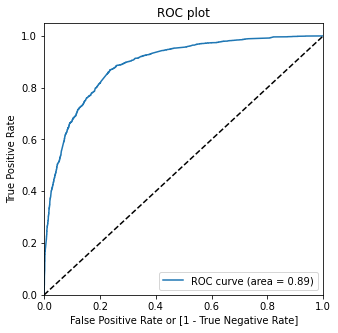

In [109]:
# Draw ROC Curve
draw_roc(df_train_pred['Converted'], df_train_pred['Convert_prob'])

In [110]:
# Plot cutoff values
cutoff_values = [0.1,0.2,0.3,0.4,0.5,0.6]

for i in cutoff_values:
    df_train_pred[i] = df_train_pred['Convert_prob'].apply(lambda x:1 if x>i else 0)
    
df_train_pred.head()

Lead Number  Converted  Convert_prob  Convert_Pred  0.1  0.2  0.3  0.4  \
5493         5493          0      0.063062             0    0    0    0    0   
8064         8064          0      0.062822             0    0    0    0    0   
4716         4716          0      0.026971             0    0    0    0    0   
9117         9117          0      0.340610             0    1    1    1    0   
2402         2402          1      0.459993             0    1    1    1    1   

      0.5  0.6  
5493    0    0  
8064    0    0  
4716    0    0  
9117    0    0  
2402    0    0

In [111]:
# Plot accuracy, sensitivity, specificity

# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.1,0.2,0.3,0.4,0.5,0.6]
for i in num:
    cm1 = metrics.confusion_matrix(df_train_pred['Converted'], df_train_pred[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.1   0.1  0.634019  0.971381  0.425940
0.2   0.2  0.767722  0.906678  0.682016
0.3   0.3  0.803797  0.868519  0.763878
0.4   0.4  0.811709  0.769390  0.837810
0.5   0.5  0.812658  0.691414  0.887439
0.6   0.6  0.807753  0.628785  0.918138


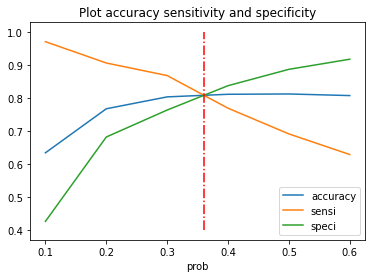

In [112]:
#Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.36, ymax=1, ymin=0.4, colors="r", linestyles="-.")
plt.title("Plot accuracy sensitivity and specificity")
plt.show()

#### <font color = blue> Confusion metrics and scores</font>

In [113]:
# Function to calcualte confusion metrics and scores
def calctrainseult(cutoff):
    optimal_cutoff = cutoff
    print("Mertic for cutoff: ",optimal_cutoff)
    print("="*50)
    # Building prediction with optimal cutoff value
    df_train_pred["Convert_Pred_optimal"] = df_train_pred['Convert_prob'].apply(lambda x:1 if x>optimal_cutoff else 0)

    # Confusion metrix 
    confusion = metrics.confusion_matrix(df_train_pred['Converted'], df_train_pred['Convert_Pred_optimal'])
    print("Confusion Metrics")
    print(confusion)
    print("="*50)

    # Check accuracy, sensitivity, specificity and precision for model
    print("Score")
    confscores(confusion)

In [114]:
# Calculate train result for cutoff 0.355
calctrainseult(0.36)

Mertic for cutoff:  0.36
Confusion Metrics
[[3165  744]
 [ 469 1942]]
Score
Accuracy:  0.8081
Sensitivity:  0.8055
Specificity:  0.8097
Precision:  0.723


#### <font color = blue>2.4.6 Precision - Recall plot</font>

In [115]:
# Calcualte precision and recall
p, r, thresholds = precision_recall_curve(df_train_pred['Converted'], df_train_pred['Convert_prob'])

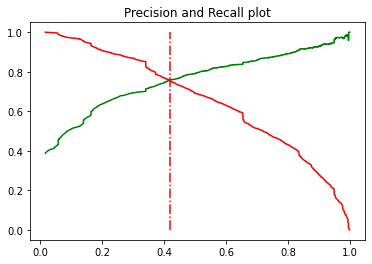

In [116]:
# Plot precisio and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.vlines(x=0.42, ymax=1, ymin=0.0, colors="r", linestyles="-.")
plt.title("Precision and Recall plot")
plt.show()

In [117]:
# Calculate train result for cutoff 0.42
calctrainseult(0.42)

Mertic for cutoff:  0.42
Confusion Metrics
[[3328  581]
 [ 595 1816]]
Score
Accuracy:  0.8139
Sensitivity:  0.7532
Specificity:  0.8514
Precision:  0.7576


##### Insight:
- cutoff of 0.42 is the optimal value

In [118]:
# Set optimal cutoff
optimal_cutoff = 0.42
calctrainseult(optimal_cutoff)

Mertic for cutoff:  0.42
Confusion Metrics
[[3328  581]
 [ 595 1816]]
Score
Accuracy:  0.8139
Sensitivity:  0.7532
Specificity:  0.8514
Precision:  0.7576


### <font color = blue>3.2 Prediction on test set</font>

In [119]:
X_test = X_test[selected_features]

In [120]:
X_test_sm = sm.add_constant(X_test[selected_features])
X_test_sm
X_test_sm

const  Do Not Email  Total Time Spent on Website  \
4664    1.0             0                    -0.878776   
5394    1.0             0                    -0.582229   
1595    1.0             0                     1.238640   
2111    1.0             0                     0.065110   
9182    1.0             0                    -0.878776   
1055    1.0             0                     1.171736   
541     1.0             0                    -0.166341   
446     1.0             0                    -0.878776   
3728    1.0             0                    -0.810064   
4249    1.0             1                    -0.837187   
9123    1.0             0                    -0.354395   
5036    1.0             0                    -0.878776   
2015    1.0             0                    -0.310998   
2112    1.0             0                     1.216941   
4118    1.0             0                    -0.878776   
6195    1.0             1                    -0.432148   
2305    1.0             0                    -0.292916   
8329    1.0             0                    -0.878776   
7651    1.0             0                     1.050586   
2673    1.0             0                    -0.878776   
8105    1.0             0                     1.345324   
755     1.0             0                    -0.493627   
3864    1.0             0                     0.287520   
2732    1.0             0                    -0.813681   
6057    1.0             0                    -0.878776   
8352    1.0             0                    -0.878776   
8858    1.0             0                    -0.659983   
544     1.0             0                    -0.605736   
7114    1.0             0                    -0.710612   
5651    1.0             0                    -0.341737   
5296    1.0             0                    -0.399600   
1210    1.0             0                    -0.432148   
4146    1.0             1                    -0.667215   
9048    1.0             1                     2.256663   
7497    1.0             0                    -0.061465   
8308    1.0             0                     0.833600   
2644    1.0             0                     0.312835   
1874    1.0             0                    -0.878776   
7498    1.0             0                    -0.813681   
6747    1.0             0                    -0.878776   
6295    1.0             0                    -0.878776   
3251    1.0             0                     0.021713   
7508    1.0             0                    -0.430340   
8990    1.0             0                     1.697925   
1709    1.0             0                    -0.878776   
5637    1.0             0                    -0.509901   
3461    1.0             0                     1.240448   
6178    1.0             0                     1.970965   
5899    1.0             0                    -0.188039   
3259    1.0             0                    -0.878776   
2359    1.0             0                    -0.878776   
6354    1.0             0                     0.875189   
8612    1.0             0                    -0.878776   
5498    1.0             0                    -0.734119   
6950    1.0             0                    -0.318231   
554     1.0             0                    -0.204313   
8516    1.0             0                     0.368890   
2822    1.0             0                    -0.878776   
8656    1.0             0                    -0.878776   
6560    1.0             0                    -0.077738   
5163    1.0             0                    -0.146450   
4145    1.0             0                     1.103024   
6359    1.0             0                    -0.589462   
8213    1.0             0                     1.406803   
4781    1.0             0                    -0.878776   
3738    1.0             0                     0.555136   
4350    1.0             0                    -0.433956   
1508    1.0             0                    -0.300148   
5259

In [121]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res6.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

Converted  Conversion_Prob
0          0         0.341992
1          0         0.079094
2          1         0.860362
3          0         0.116006
4          0         0.419144

In [122]:
# Making prediction using cut off 0.42
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [123]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8150609080841639

In [124]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1388,  255],
       [ 246,  820]], dtype=int64)

In [125]:
# Check accuracy, sensitivity, specificity and precision for model
confscores(confusion2)

Accuracy:  0.8151
Sensitivity:  0.7692
Specificity:  0.8448
Precision:  0.7628


In [126]:
# Making prediction using cut off 0.355
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.36 else 0)

In [127]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8135843484680694

In [128]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1329,  314],
       [ 191,  875]], dtype=int64)

In [129]:
# Check accuracy, sensitivity, specificity and precision for model
confscores(confusion2)

Accuracy:  0.8136
Sensitivity:  0.8208
Specificity:  0.8089
Precision:  0.7359


## <font color = brown>SECTION 4: CONCLUSION</font>

##### Conclusion

- While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the optimal cut off based on Sensitivity and Specificity for calculating the final prediction.
- Accuracy, Sensitivity, Specificity and Precision values of train set are 80.81%, 80.55%, 80.97% and 72.30% respectively
- Accuracy, Sensitivity, Specificity and Precision values of test set are 81.36%, 82.08%, 80.89% and 73.59%  respectively
- The values of Accuracy, Sensitivity and Specificity for both train and test are closer and hence we can conlude that this is a good model.